In [ ]:
# Download of Data and Execution of Prophet happens in the same local computer

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import MetaTrader5 as mt5
import numpy as np
import more_itertools as mit
import time
import os

In [5]:
# NUMBER OF COLUMNS TO BE DISPLAYED
pd.set_option('display.max_columns', 500)

# MAXIMUM TABLE WIDTH TO DISPLAY
pd.set_option('display.width', 1500)      
 
# ESTABLISH CONNECTION TO MT5 TERMINAL
if not mt5.initialize():
    print("initialize() FAILED, ERROR CODE =",mt5.last_error())
    quit() 

12:23:16 - cmdstanpy - INFO - Chain [1] start processing
12:25:21 - cmdstanpy - INFO - Chain [1] done processing


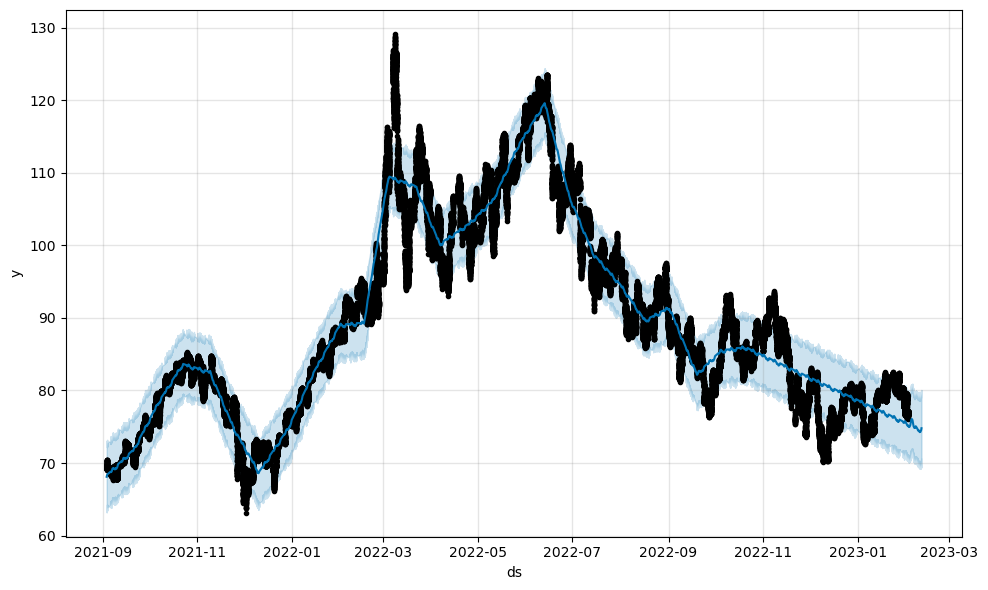

In [6]:
numCandles  = 100000
currency_pair = "WTI"
rates_frame =  mt5.copy_rates_from_pos(currency_pair, mt5.TIMEFRAME_M5, 1, numCandles)
rates_frame = pd.DataFrame(rates_frame)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

# prepare data for prophet
p = int(0.025*len(rates_frame))


df = pd.DataFrame()
df["ds"]     = rates_frame["time"]
df["y"]      = rates_frame["close"]



# fit prophet model
model = Prophet()

model.fit(df)

# predict future p closing prices
future = model.make_future_dataframe(periods=p, freq='5min')

forecast = model.predict(future)


# plot predicted vs actual values
model.plot(forecast)
plt.show()